### Abhishek Kumar
### CS-422 Data Mining Project
### A20467982

### Abstract
#### Data mining projects can be difficult to complete and developing new model are quite resilient. A life cycle is critical to the overall performance of such projects in terms of project management and success rates. I learned about collecting data to be mined, cleaning it, and transforming its attributes to provide inputs for data mining models are all part of deploying a data mining solution. These models must also be developed, used, and incorporated with various applications. I learned to research, read, and understand the documentation of Python tools/packages, along with installing packages. Data cleaning has been identified as an important problem. However, little progress has been made thus far. It helps in understanding the process, methods, and do research in exploring the efficient model to apply on the given dataset. Indeed, it does not feed the system with every known data point in any related field. We want to feed the system with carefully curated data, hoping it can learn, and perhaps extend, at the margins, knowledge that people already have.

### Overview 
#### Problem statement: The aim of this project is to develop a model that generalizes far beyond the sample size.
#### The project consists of three phases:
#### (1) identify and categorize the possible error and accuracy in data from multiple sources,
#### (2) survey the available and potentially usable techniques to address the problem  ; 
#### (3) and develop a method that can identify and resolve some of the errors and efficiently increase the accuracy of the given dataset

### Python libraries and packages

In [47]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn_pandas import DataFrameMapper



from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from feature_selector import FeatureSelector
from mlxtend.feature_selection import ColumnSelector

from sklearn.datasets import make_classification

from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

import onnxruntime as rt 
from onnx.tools.net_drawer import GetPydotGraph,GetOpNodeProducer 
from onnxmltools.convert.common.shape_calculator import calculate_linear_classifier_output_shapes

In [48]:
df=pd.read_csv('data_public.csv.gz',compression='gzip',header=0,sep=',',quotechar='"')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3


In [49]:
num_vars = df.columns[df.dtypes!='object']
cat_vars = df.columns[df.dtypes=='object']
df[num_vars].isnull().sum()

A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

### Data Processing

#### ‘train_test_split()’ method function split arrays or matrices into random train and test subsets 
#### First, separate the features(X) from the labels(Y).

- X: All the features minus the value we want to predict.

- Y: Class Label - Value we want to predict.

#### Second, use Scikit-learn to randomly shuffle this data into four variables. In this case, I'm training 70% of the data, then testing against the other 30%.

In [50]:
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
X = pd.DataFrame(data=df.drop('Class',axis=1),columns=labels)
Y = pd.DataFrame(data=df['Class'],columns=['Class'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
training_data = pd.concat([X_train,Y_train],axis=1)

print("\n******************** Training data ********************")
training_data.head()



******************** Training data ********************


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
1001103,-35.110439,-12.347259,9.942710,13.397650,-21.936382,-27.895079,1.946777,-24.535140,-4.698546,24.945670,3.256112,3.984136,-54.073989,-2.645166,5.303716,1
457980,230.452730,-10.397837,219.932637,-9.942152,121.950581,68.262415,112.376267,211.182477,88.217924,139.980997,203.459954,0.080898,-12.582176,152.267695,155.197791,2
579314,-39.728447,-13.368732,1.821195,21.233740,-26.279616,-29.433928,-2.562266,-27.892616,-7.239721,21.470408,0.381308,5.411868,-53.458654,-5.463586,-2.430118,2
765943,244.137967,-10.264700,226.682031,-12.687747,130.290220,88.758232,121.712836,201.091447,80.602231,121.957299,206.552450,-9.360301,-22.157111,144.866029,153.030429,2
79427,-42.311717,-22.291997,9.249230,24.679396,-21.990499,-18.249143,-5.901953,-27.673327,-14.712656,21.660847,4.260098,5.047994,-53.872241,-6.162497,2.682549,1


In [51]:
print("\n******************** Test data ********************")
display(X_test)


******************** Test data ********************


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
982870,-32.806445,-7.612771,14.928463,21.704369,-19.002601,-34.673451,1.051975,-24.100352,-8.300025,23.181405,1.818101,4.219895,-54.675986,-11.951310,-0.023011
917024,235.871126,-11.236162,218.204149,-13.061673,129.584280,85.167901,134.472116,202.458240,66.867769,134.987630,228.611966,-6.492893,-28.111128,150.258530,154.732373
854672,-59.158743,-57.549283,-37.413488,-113.194496,-18.962228,-131.693436,-56.982405,-9.522220,53.282912,-90.381530,46.683870,-32.762417,-35.587918,37.687957,61.703494
284286,-35.336289,-16.227000,11.173417,19.718846,-24.106394,-22.477240,-0.389432,-25.910978,-10.370952,24.663597,2.848733,-0.839201,-55.281918,-2.525145,2.307983
801432,237.278878,-5.346782,220.753410,-14.458745,134.614570,89.606306,123.457527,201.520356,86.756915,117.948109,222.493395,-0.784379,-14.259451,141.230845,156.862962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905633,-39.410332,-18.753808,6.000460,18.635392,-29.358904,-30.205367,3.777898,-30.108391,-5.598258,35.765597,-3.081205,7.905560,-52.078873,-5.951235,-0.216368
617592,-58.520455,-46.217688,-40.757228,-115.941650,-19.855153,-131.226244,-51.305881,-13.336107,52.947037,-90.683331,31.376229,-35.749333,-52.000327,27.783829,61.528746
791891,230.407794,-8.061797,216.146844,-14.924281,133.495863,59.724164,116.959392,196.793912,86.744760,125.307073,217.916330,-1.467580,-16.971563,154.441186,149.818143
212229,-32.859503,-10.252158,4.571131,27.353440,-24.347174,-34.598631,-10.995891,-25.121329,-4.870423,26.492555,0.945532,9.443123,-55.206194,-9.258924,3.149833


#### Finding any missing value using FeatureSelector property. 

In [52]:
fs_missing_test=FeatureSelector(data=training_data)#This tests all features and the class labels
fs_missing_test.identify_missing(missing_threshold=0)

No labels provided. Feature importance based methods are not available.
0 features with greater than 0.00 missing values.



#### Applying PCA , for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. And also check, need of pca components for data analysis

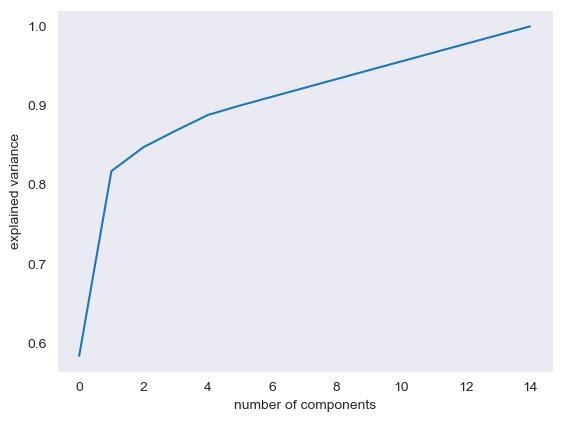

In [53]:
sc = QuantileTransformer()
df_scaled = sc.fit_transform(df.drop('Class',axis=1))
df_scaled = pd.DataFrame(df_scaled,columns=labels)
df_scaled = pd.concat([df_scaled,df['Class']],axis=1)

pca_test = decomposition.PCA(n_components=15)

pca_test.fit(df_scaled.drop('Class',axis=1))

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()


#### So,  from the above graph, it shows that bent of elbow at 1, that is number of component is 1, so used this in all pipeline.

In [54]:
pca_test.explained_variance_ratio_

array([0.58426791, 0.23312231, 0.03029826, 0.02077847, 0.0197978 ,
       0.01194113, 0.0111523 , 0.0111429 , 0.01111829, 0.01111348,
       0.01108424, 0.01107475, 0.01106041, 0.01103111, 0.01101665])

### Feature selection techniques that are easy to use and also gives good results.
#### Using ExtraClassClassifier class which implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

<ipython-input-55-f4cf1722d5d5>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,Y)


[0.06664519 0.06667884 0.06661918 0.0667196  0.06664757 0.06669851
 0.0666527  0.06666342 0.06663205 0.06664711 0.06665607 0.06670036
 0.06667379 0.06668981 0.06667581]


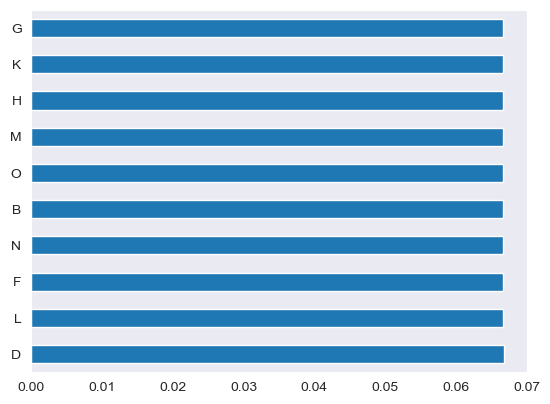

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset. Here, top 10 features are: I, H, J, G, N, O, B, L, E, K, D

### Data analysis
#### The data classification can be performed using more than  one  technique  i.e.  logistic  regression  and RandomForest Classifier.  These  approached  can  be used  to  train  and  classify  our  data  and  to  make predictions.  We  can  later  compare  our  results obtained  from  each  approach  and  find  out  which approach works best with the project. I have worked on  RandomForest Classifier and Logistic regression method and obtain result from them. Moreover, for the  data  exploration 

### Hypothesis 
#### That a drop in accuracy means the removed function is one of the problematic ones that causes the model to be overfit. The initial pipeline and parameters were a slightly changed version of the one shown in the example notebook. We're using all of the features and attempting to determine the overall accuracy of the dataset by removing each column one at a time. Here, we used DataFrameMapper(), a class for mapping pandas data frame columns to different sklearn transformations. Further, transformed features as QuantileTransformer(). As a classifier, used Decision Tree Classifier, to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [56]:
features='ABCDEFGHIJKLMNO'
for i in range(0,len(features)):
    pipeline=Pipeline([('mapper',DataFrameMapper([(X_train.columns.drop([features[i:i+1]]).values,
                                                       [QuantileTransformer()])])),
                           ('pca',PCA(n_components=1)),
                           ('classifier',DecisionTreeClassifier(max_depth=3))])
    pipeline.fit(training_data.drop([features[i:i+1]],axis=1),training_data['Class'])
    results = pipeline.predict(X_test)
    actual = np.concatenate(Y_test.values)
    print("Dropped feature:",features[i:i+1],", Accuracy:",metrics.accuracy_score(actual,results))

Dropped feature: A , Accuracy: 0.4988694444444444
Dropped feature: B , Accuracy: 0.4988666666666667
Dropped feature: C , Accuracy: 0.4988666666666667
Dropped feature: D , Accuracy: 0.49882777777777776
Dropped feature: E , Accuracy: 0.4988444444444444
Dropped feature: F , Accuracy: 0.4988611111111111
Dropped feature: G , Accuracy: 0.4988638888888889
Dropped feature: H , Accuracy: 0.4988722222222222
Dropped feature: I , Accuracy: 0.49883333333333335
Dropped feature: J , Accuracy: 0.4987666666666667
Dropped feature: K , Accuracy: 0.49885277777777776
Dropped feature: L , Accuracy: 0.49885833333333335
Dropped feature: M , Accuracy: 0.49887777777777775
Dropped feature: N , Accuracy: 0.49885833333333335
Dropped feature: O , Accuracy: 0.49885555555555555


#### Here, we can observe that some of the features after being dropped, results in minor change in accuracy. So, we chose the by selecting multiple features from top 10- feature selection method in order to check the accuracy of dataset to be modelled. Additionally, at this point in the project I switched to using Logistic Regression in my pipeline, however, at this stage they are untuned.

In [57]:
to_drop = ['B', 'G', 'O']
transform_1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(transformers=[('num',transform_1, to_drop)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
pipeline.fit(X_train,Y_train.values.ravel())
results = pipeline.predict(X_test)
actual = np.concatenate(Y_test.values)
print(" Accuracy:",metrics.accuracy_score(actual,results))

 Accuracy: 0.4988694444444444


In [58]:
df.corr('pearson')

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
A,1.000000,0.455949,0.991999,0.071330,0.990703,0.905353,0.972223,0.988807,0.818399,0.870016,0.968827,0.139619,0.958931,0.953081,0.920322,-0.000620
B,0.455949,1.000000,0.541742,0.865856,0.352946,0.760708,0.620607,0.339549,-0.098558,0.803246,0.246429,0.854635,0.345030,0.194578,0.098805,0.000138
C,0.991999,0.541742,1.000000,0.176224,0.971805,0.943482,0.988351,0.968342,0.753474,0.915784,0.937868,0.238723,0.941040,0.916578,0.873800,-0.000686
D,0.071330,0.865856,0.176224,1.000000,-0.047459,0.477183,0.279248,-0.062451,-0.502643,0.544357,-0.163679,0.949485,-0.042057,-0.217856,-0.316241,0.000150
E,0.990703,0.352946,0.971805,-0.047459,1.000000,0.849129,0.939705,0.997116,0.879142,0.805749,0.989217,0.026319,0.964769,0.979925,0.958885,-0.000649
F,0.905353,0.760708,0.943482,0.477183,0.849129,1.000000,0.969055,0.841227,0.508345,0.989868,0.781534,0.518117,0.823551,0.745156,0.675416,-0.000540
G,0.972223,0.620607,0.988351,0.279248,0.939705,0.969055,1.000000,0.934714,0.678043,0.949429,0.894114,0.335039,0.910385,0.867546,0.815281,-0.000472
H,0.988807,0.339549,0.968342,-0.062451,0.997116,0.841227,0.934714,1.000000,0.886017,0.796856,0.990875,0.012005,0.964627,0.982403,0.962873,-0.000670
I,0.818399,-0.098558,0.753474,-0.502643,0.879142,0.508345,0.678043,0.886017,1.000000,0.439881,0.926217,-0.418110,0.848801,0.943365,0.970965,-0.000766
J,0.870016,0.803246,0.915784,0.544357,0.805749,0.989868,0.949429,0.796856,0.439881,1.000000,0.730841,0.579309,0.781815,0.691273,0.615931,-0.000333


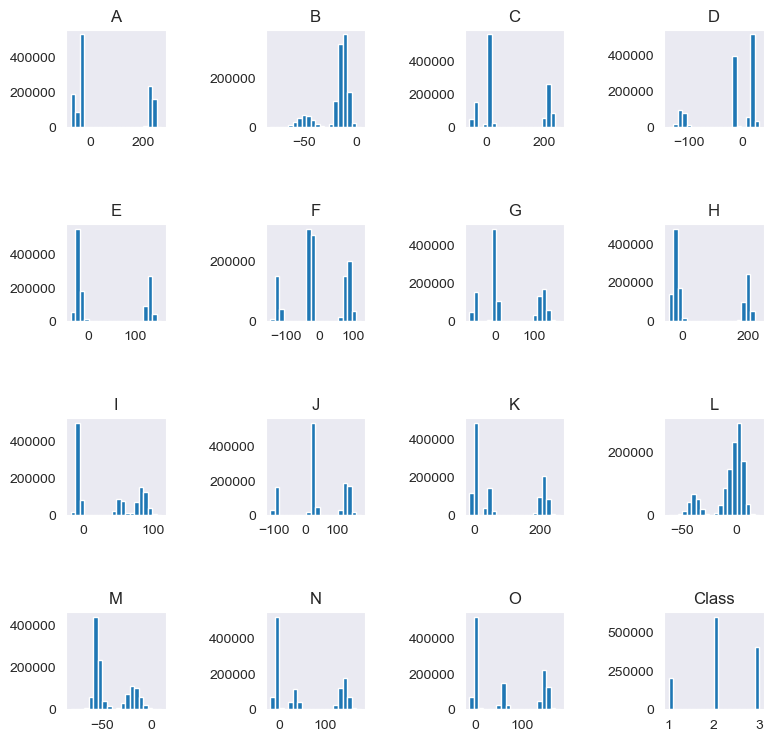

In [59]:
fig1=plt.figure()
for i in range(1,16):
    fig1.add_subplot(4,4,i)
    plt.hist(df[features[i-1:i]],bins=20)
    plt.title(features[i-1:i])
fig1.add_subplot(4,4,16)
plt.hist(df['Class'],bins=20)
plt.title('Class')
fig1.subplots_adjust(hspace=1,wspace=1)
fig1.set_figheight(9)
fig1.set_figwidth(9)

#### K-fold Accuracy method for estimating the performance of a learning algorithm or configuration on a dataset.

In [60]:
def plotAccuracyKFold(scores, model):
    plt.figure()
    sns.set_style('dark')
    plt.plot(range(1,len(scores)+1), scores, 'b')
    plt.title("10 fold Accuracy of "+model)
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.show()

#### Heatmap makes it easy to identify which features are most related to the target variable. Thus, we will plot heatmap of correlated features using the seaborn library.  Adding redundant variables reduces the model's generalization potential while also lowering the overall accuracy of a classifier. Adding more variables to a model often increases the overall complexity.
#### There are five methods used to identify features to remove:

    Missing Values
    Single Unique Values
    Collinear Features
    Zero Importance Features
    Low Importance Features

#### The FeatureSelector also includes a number of visualization methods to inspect characteristics of a dataset
#### Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features. A neat visualization we can make with correlations is a heatmap. This shows all the features that have at least one correlation above the threshold:


In [61]:
fs=FeatureSelector(data=training_data.drop('Class',axis=1),labels=training_data['Class'])
fs.identify_collinear(correlation_threshold=0.98)

8 features with a correlation magnitude greater than 0.98.



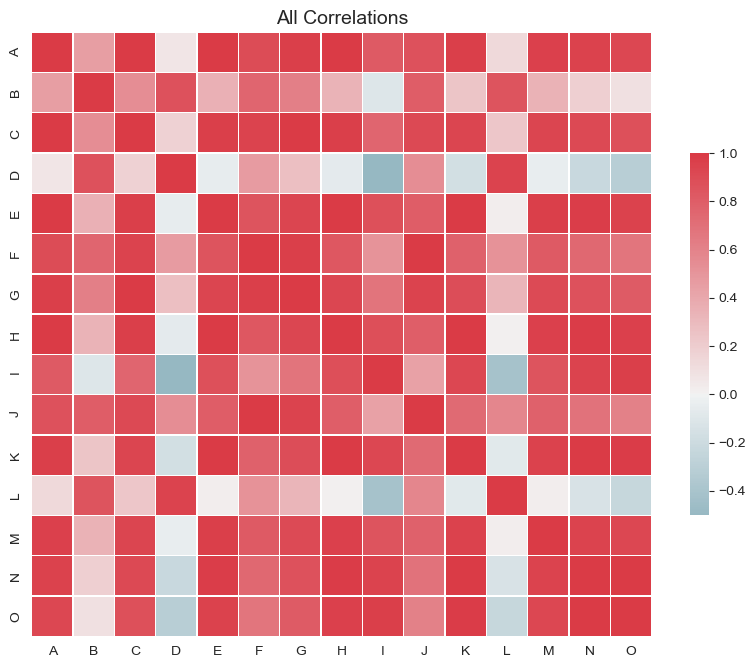

In [62]:
fs.plot_collinear(plot_all=True)

In [63]:
collinear_features=fs.ops['collinear']
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,C,A,0.992005
1,E,A,0.990706
2,G,C,0.988354
3,H,A,0.988817
4,H,E,0.997113
5,J,F,0.989866
6,K,E,0.989222
7,K,H,0.990878
8,N,H,0.982397
9,N,K,0.992151


#### Zero importance feature to eliminate the unwanted features

In [64]:
fs.identify_zero_importance(task='classification',eval_metric='multi_error',n_iterations=10,early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_error: 0.500437	valid_0's multi_logloss: 1.01138
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_error: 0.500437	valid_0's multi_logloss: 1.01138
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_error: 0.500437	valid_0's multi_logloss: 1.01139
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's multi_error: 0.500437	valid_0's multi_logloss: 1.01139
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3]	valid_0's multi_error: 0.500437	valid_0's multi_logloss: 1.01138
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2]	valid_0's multi_error: 0.500437	val

#### Here, it shows, none of the features are less important during one-hot encoding. Though we used by plotting graph of it find any conclusive result.  

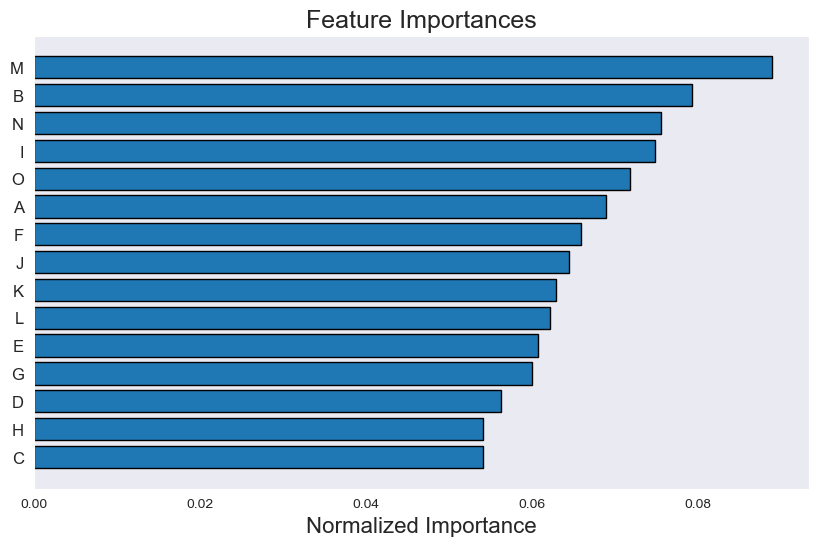

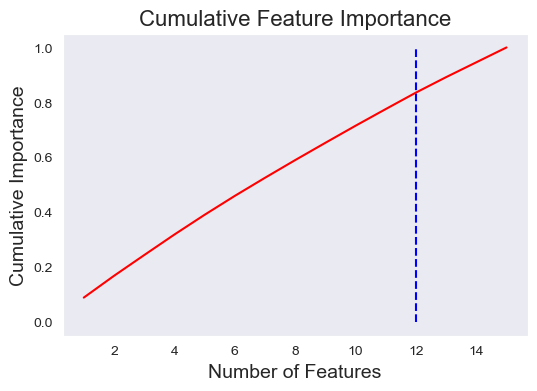

12 features required for 0.80 of cumulative importance


In [65]:
zero_importance_features=fs.ops['zero_importance']
fs.plot_feature_importances(threshold=0.80,plot_n=15)

In [66]:
to_keep1 = ['M','B','N','I','O','J','D','A','K','G']
transform_2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                              ('scaler', StandardScaler())])
preprocessor1 = ColumnTransformer(transformers=[('num',transform_2, to_keep1)])
pipeline1 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier', DecisionTreeClassifier(max_depth=3))])
pipeline1.fit(X_train,Y_train.values.ravel())
results = pipeline1.predict(X_test)
actual = np.concatenate(Y_test.values)
print(" Accuracy:",metrics.accuracy_score(actual,results))

 Accuracy: 0.4988722222222222


#### After selecting the features, I was able to maximize the accuracy of model, but that's not much significant result. Here, I used Decision Tree Classifier and Standard Scaler as classifer and scaler respectively. 
#### Decision Tree Classfier: This is a class capable of performing multi-class classification on a dataset. It is also  capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification

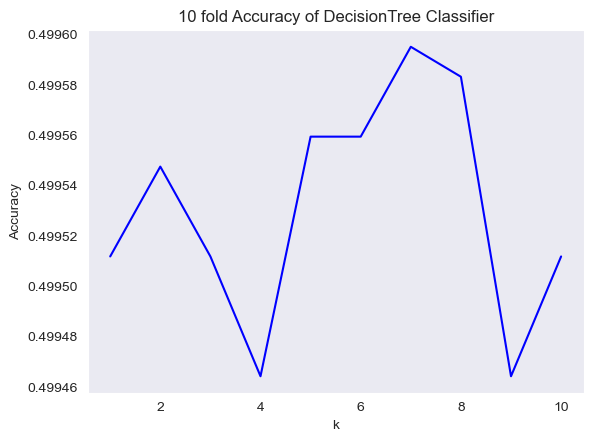

In [67]:
scores = cross_val_score(DecisionTreeClassifier(max_depth=3), X_train, Y_train.values.ravel(), cv=10)
plotAccuracyKFold(scores,'DecisionTree Classifier')

#### After selecting the features, I was able to increase the accuracy of model, but that's not much significant result. Here, I used RandomForest Tree Classifier and Standard Scaler as classifer and scaler respectively. 
#### Random Forest Tree Classfier: It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [68]:
to_keep2 = ['A','B','D','I','G','O']
transform_3 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('pca',PCA(n_components=1)), 
                              ('scaler', QuantileTransformer())])
preprocessor2 = ColumnTransformer(transformers=[('num',transform_3, to_keep2)])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('classifier', RandomForestClassifier(max_depth=2,n_estimators=10))])
pipeline2.fit(X_train,Y_train.values.ravel())
results = pipeline2.predict(X_test)
actual = np.concatenate(Y_test.values)
print(" Accuracy:",metrics.accuracy_score(actual,results))

 Accuracy: 0.4988694444444444


#### Here, it shows slight change and decrement in accuracy as we reduced the feature and even when applied different model, so we chose Decision Tree to be more efficient over Random Tree Classifier. But, can apply with different feature as Brute Force method to check for any improvement of the model.


### Cross Validation using K-fold
#### It is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.  

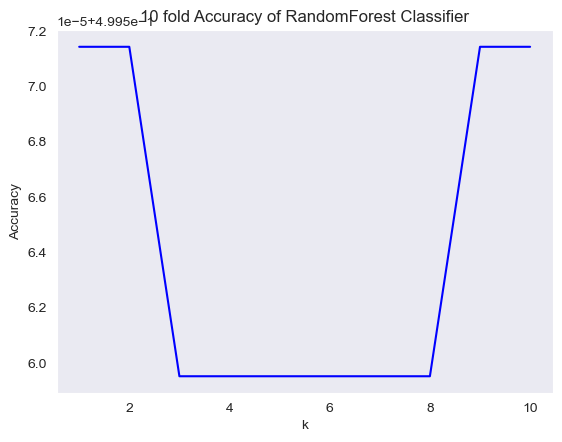

In [69]:
scoresRF = cross_val_score(RandomForestClassifier(max_depth=2,n_estimators=10), X_train, Y_train.values.ravel(), cv=10)
plotAccuracyKFold(scoresRF,'RandomForest Classifier')

### Model Training

In [70]:
to_test = [['B'],['G'],['O'],['B','G'],['B','G'],['G','O'],['B','G','O']]
for to_keep3 in to_test:
    transform_4 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('pca',PCA(n_components=1)), 
                                  ('scaler', QuantileTransformer())])
    preprocessor3 = ColumnTransformer(transformers=[('num',transform_4, to_keep3)])
    pipeline3 = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('classifier', RandomForestClassifier(max_depth=3,n_estimators=10))])
    pipeline3.fit(X_train,Y_train.values.ravel())
    results = pipeline3.predict(X_test)
    actual = np.concatenate(Y_test.values)
    print('Feature(s) tested:',to_keep3,'Accuracy:',metrics.accuracy_score(actual,results))

Feature(s) tested: ['B'] Accuracy: 0.4988694444444444
Feature(s) tested: ['G'] Accuracy: 0.4988694444444444
Feature(s) tested: ['O'] Accuracy: 0.4988694444444444
Feature(s) tested: ['B', 'G'] Accuracy: 0.4988666666666667
Feature(s) tested: ['B', 'G'] Accuracy: 0.4988694444444444
Feature(s) tested: ['G', 'O'] Accuracy: 0.4988638888888889
Feature(s) tested: ['B', 'G', 'O'] Accuracy: 0.4988694444444444


In [71]:
col_select = ['B']
transform_5 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('pca',PCA(n_components=1)), 
                              ('scaler', QuantileTransformer())])
preprocessor4 = ColumnTransformer(transformers=[('num',transform_5, col_select)])
cv_pipeline1 = Pipeline(steps=[('preprocessor', preprocessor4),
                      ('classifier', RandomForestClassifier(max_depth=3,n_estimators=10))])
cv_pipeline1.fit(X_train,Y_train.values.ravel())
results = cv_pipeline1.predict(X_test)
actual = np.concatenate(Y_test.values)
print(metrics.classification_report(actual,results,zero_division=1))
print(" Accuracy:",metrics.accuracy_score(actual,results))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00     60234
           2       0.50      1.00      0.67    179593
           3       1.00      0.00      0.00    120173

    accuracy                           0.50    360000
   macro avg       0.83      0.33      0.22    360000
weighted avg       0.75      0.50      0.33    360000

 Accuracy: 0.4988694444444444


### Cross Validation using K-fold
#### It is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. 

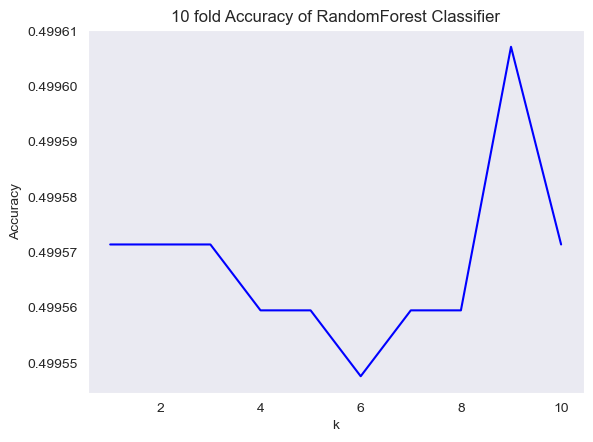

In [72]:
scoresRF = cross_val_score(RandomForestClassifier(max_depth=3,n_estimators=10), X_train, Y_train.values.ravel(), cv=10)
plotAccuracyKFold(scoresRF,'RandomForest Classifier')

#### Trying using different columns as mentioned earlier  

In [73]:
col_select = ['B','G']
transform_6 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('pca',PCA(n_components=1)), 
                              ('scaler', QuantileTransformer())])
preprocessor5 = ColumnTransformer(transformers=[('num',transform_6, col_select)])
cv_pipeline2 = Pipeline(steps=[('preprocessor', preprocessor5),
                      ('classifier', RandomForestClassifier(max_depth=3,n_estimators=10))])
cv_pipeline2.fit(X_train,Y_train.values.ravel())
results = cv_pipeline2.predict(X_test)
actual = np.concatenate(Y_test.values)
print(metrics.classification_report(actual,results,zero_division=1))
print(" Accuracy:",metrics.accuracy_score(actual,results))

              precision    recall  f1-score   support

           1       0.50      0.00      0.00     60234
           2       0.50      1.00      0.67    179593
           3       0.25      0.00      0.00    120173

    accuracy                           0.50    360000
   macro avg       0.42      0.33      0.22    360000
weighted avg       0.42      0.50      0.33    360000

 Accuracy: 0.498875


In [74]:
col_select = ['B','G','O']
transform_6 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('pca',PCA(n_components=1)), 
                              ('scaler', QuantileTransformer())])
preprocessor5 = ColumnTransformer(transformers=[('num',transform_6, col_select)])
cv_pipeline3 = Pipeline(steps=[('preprocessor', preprocessor5),
                      ('classifier', RandomForestClassifier(max_depth=3,n_estimators=10))])
cv_pipeline3.fit(X_train,Y_train.values.ravel())
results = cv_pipeline3.predict(X_test)
actual = np.concatenate(Y_test.values)
print(metrics.classification_report(actual,results,zero_division=1))
print(" Accuracy:",metrics.accuracy_score(actual,results))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00     60234
           2       0.50      1.00      0.67    179593
           3       1.00      0.00      0.00    120173

    accuracy                           0.50    360000
   macro avg       0.83      0.33      0.22    360000
weighted avg       0.75      0.50      0.33    360000

 Accuracy: 0.4988694444444444


####  Chosen linerSVC model which was implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme 

In [75]:
final_pipeline = Pipeline(steps=[('feature_selection', SelectFromModel(LinearSVC(penalty="l1",loss='squared_hinge',
                                                                                 dual=False,
                                                                       max_iter=10000))),
                       ('scaler', QuantileTransformer()),
                      ('classifier', RandomForestClassifier(max_depth=2,n_estimators=100))])
final_pipeline.fit(X_train,Y_train.values.ravel())

# Model prediction on test data
results = final_pipeline.predict(X_test)
actual = np.concatenate(Y_test.values)
print(metrics.classification_report(actual, results, zero_division=1))
print(" \nAccuracy:",metrics.accuracy_score(actual,results))

              precision    recall  f1-score   support

           1       1.00      0.00      0.00     60234
           2       0.50      1.00      0.67    179593
           3       1.00      0.00      0.00    120173

    accuracy                           0.50    360000
   macro avg       0.83      0.33      0.22    360000
weighted avg       0.75      0.50      0.33    360000

 
Accuracy: 0.4988694444444444


#### Here, to accuracy remained same and choosing different models doesn't given much of the significant improvement. So,I applied different approach where we can work on class labels and then experiment and run different models . 

### Model Validation 

#### As we can see from above that accuracy doesn't change much after selecting different columns and applying models. Selected the most significant features and tried to increase the accuracy by training the model. But after maximum iteration and applying RandomForest Classifier and using Feature Selection, we are only able to increase accuracy very slightly to approx 0.4988. 

#### Now, after doing feature selection individually and with different grouping of features, I am applying model and creating pipeline by diving dataframe class wise. Here, we are dividing and merging as class level 1,2 and 3.  Here, we tried to find maximum accuracy using that specific class. Like, using Dataframe of class 1 and 2, 2 and 3 and so on. 

In [77]:
df1 =df[df['Class']==1]
df2 =df[df['Class']==2]
df3 =df[df['Class']==3]
df_12=pd.concat([df1,df2])
df_13=pd.concat([df1,df3])
df_23=pd.concat([df2,df3])
df_123=pd.concat([df1,df2,df3])

In [78]:
X_df12 = pd.DataFrame(data=df_12.drop('Class',axis=1))
Y_df12 = pd.DataFrame(data=df_12['Class'],columns=['Class'])
X_train_12,X_test_12,Y_train_12,Y_test_12 = train_test_split(X_df12,Y_df12,test_size=0.3)
training_data_12 = pd.concat([X_train_12,Y_train_12],axis=1)

In [81]:
X_df13 = pd.DataFrame(data=df_13.drop('Class',axis=1))
Y_df13 = pd.DataFrame(data=df_13['Class'],columns=['Class'])
X_train_13,X_test_13,Y_train_13,Y_test_13 = train_test_split(X_df13,Y_df13,test_size=0.3)
training_data_13 = pd.concat([X_train_13,Y_train_13],axis=1)


In [83]:
X_df23 = pd.DataFrame(data=df_23.drop('Class',axis=1))
Y_df23 = pd.DataFrame(data=df_23['Class'],columns=['Class'])
X_train_23,X_test_23,Y_train_23,Y_test_23 = train_test_split(X_df23,Y_df23,test_size=0.3)
training_data_23 = pd.concat([X_train_23,Y_train_23],axis=1)


In [86]:
fs_missing_test_1=FeatureSelector(data=training_data_12)#This tests all features and the class labels
fs_missing_test_1.identify_missing(missing_threshold=0)

No labels provided. Feature importance based methods are not available.
0 features with greater than 0.00 missing values.



In [87]:
fs_missing_test_2=FeatureSelector(data=training_data_13)#This tests all features and the class labels
fs_missing_test_2.identify_missing(missing_threshold=0)

No labels provided. Feature importance based methods are not available.
0 features with greater than 0.00 missing values.



In [88]:
fs_missing_test_3=FeatureSelector(data=training_data_23)#This tests all features and the class labels
fs_missing_test_3.identify_missing(missing_threshold=0)

No labels provided. Feature importance based methods are not available.
0 features with greater than 0.00 missing values.



In [89]:
features='ABCDEFGHIJKLMNO'
for i in range(0,len(features)):
    pipeline=Pipeline([('mapper',DataFrameMapper([(X_train_12.columns.drop([features[i:i+1]]).values,
                                                       [QuantileTransformer()])])),
                           ('pca',PCA(n_components=1)),
                           ('classifier',DecisionTreeClassifier(max_depth=3))])
    pipeline.fit(training_data_12.drop([features[i:i+1]],axis=1),training_data_12['Class'])
    results = pipeline.predict(X_test_12)
    actual = np.concatenate(Y_test_12.values)
    print("Dropped feature:",features[i:i+1],", Accuracy:",metrics.accuracy_score(actual,results))

Dropped feature: A , Accuracy: 0.7479792797978029
Dropped feature: B , Accuracy: 0.7479834505309343
Dropped feature: C , Accuracy: 0.7479709383315399
Dropped feature: D , Accuracy: 0.7479834505309343
Dropped feature: E , Accuracy: 0.7479667675984084
Dropped feature: F , Accuracy: 0.7479709383315399
Dropped feature: G , Accuracy: 0.7479751090646714
Dropped feature: H , Accuracy: 0.7479876212640658
Dropped feature: I , Accuracy: 0.7479542553990141
Dropped feature: J , Accuracy: 0.7479709383315399
Dropped feature: K , Accuracy: 0.7479792797978029
Dropped feature: L , Accuracy: 0.7479792797978029
Dropped feature: M , Accuracy: 0.7479876212640658
Dropped feature: N , Accuracy: 0.7479792797978029
Dropped feature: O , Accuracy: 0.7479917919971972


#### Finding the accuracy of the model looking for maximum and mimimum score of the features. As, here all the score are almost same and thus, we can conclude that we have to try choosing all the features.

In [90]:
to_all = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
transform_all = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_all = ColumnTransformer(transformers=[('num',transform_all,to_all)])
pipeline_all = Pipeline(steps=[('preprocessor', preprocessor_all),
                      ('classifier', LogisticRegression())])
pipeline_all.fit(X_train_12,Y_train_12.values.ravel())
results_all = pipeline_all.predict(X_test_12)
actual_all = np.concatenate(Y_test_12.values)
print(" Accuracy:",metrics.accuracy_score(actual_all,results_all))

 Accuracy: 0.7479834505309343


#### Here we can see change in accuracy, but it happened because we choose only 2 class labels rather than all 3 labels. So, I tried using different class labels and then significant changes can be noticed. Any features selected was solely based on previous feature seletion model, as all the features are nearly important and can choose the best features. 

In [91]:
to_keep1 = ['A','B','L','D','H','O']
transform_1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_1 = ColumnTransformer(transformers=[('num',transform_1,to_keep1)])
pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor_1),
                      ('classifier', LogisticRegression())])
pipeline_1.fit(X_train_12,Y_train_12.values.ravel())
results_1 = pipeline_1.predict(X_test_12)
actual_1 = np.concatenate(Y_test_12.values)
print(" Accuracy:",metrics.accuracy_score(actual_1,results_1))

 Accuracy: 0.7479834505309343


In [92]:
to_2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
transform_2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_2 = ColumnTransformer(transformers=[('num',transform_2,to_2)])
pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor_2),
                      ('classifier', LogisticRegression())])
pipeline_2.fit(X_train_13,Y_train_13.values.ravel())
results_2 = pipeline_2.predict(X_test_13)
actual_2 = np.concatenate(Y_test_13.values)
print(" Accuracy:",metrics.accuracy_score(actual_2,results_2))

 Accuracy: 0.6670458076257268


In [93]:
to_3 = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
transform_3 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_3 = ColumnTransformer(transformers=[('num',transform_3,to_3)])
pipeline_3 = Pipeline(steps=[('preprocessor', preprocessor_3),
                      ('classifier', LogisticRegression())])
pipeline_3.fit(X_train_23,Y_train_23.values.ravel())
results_3 = pipeline_3.predict(X_test_23)
actual_3 = np.concatenate(Y_test_23.values)
print(" Accuracy:",metrics.accuracy_score(actual_3,results_3))

 Accuracy: 0.5987373459598737


In [94]:
X_df123 = pd.DataFrame(data=df_123.drop('Class',axis=1))
Y_df123 = pd.DataFrame(data=df_123['Class'],columns=['Class'])
X_train_123,X_test_123,Y_train_123,Y_test_123 = train_test_split(X_df123,Y_df123,test_size=0.3)
training_data_123 = pd.concat([X_train_123,Y_train_123],axis=1)

#### Here, we tried to pick all the columns and then done the experiment. Used, MinMaxScaler() for scaling the data, and used Logistic Regression as we have multinomial dataset we can consider the case.  

In [95]:
to_4 = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
transform_4 = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                              ('scaler', MinMaxScaler())])
preprocessor_4 = ColumnTransformer(transformers=[('num',transform_4,to_4)])
pipeline_4 = Pipeline(steps=[('preprocessor', preprocessor_4),
                      ('classifier', LogisticRegression())])
pipeline_4.fit(X_train_123,Y_train_123.values.ravel())
results_4 = pipeline_4.predict(X_test_123)
actual_4 = np.concatenate(Y_test_123.values)
print(" Accuracy:",metrics.accuracy_score(actual_4,results_4))

 Accuracy: 0.4991111111111111


In [129]:
pipeline_4.predict(X_test_123)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [130]:
Y_test_123.values.ravel()

array([2, 1, 2, ..., 3, 1, 3], dtype=int64)

####  Here, I applied Modified version of logistic regression that predicts a multinomial probability (i.e. more than two classes) for each input example. Changing logistic regression from binomial to multinomial probability requires a change to the loss function used to train the model (e.g. log loss to cross-entropy loss), and a change to the output from a single probability value to one probability for each class label.

>0.0000 0.499 (0.000)
>0.0001 0.499 (0.000)
>0.0010 0.499 (0.000)
>0.0100 0.499 (0.000)
>0.1000 0.499 (0.000)
>1.0000 0.499 (0.000)


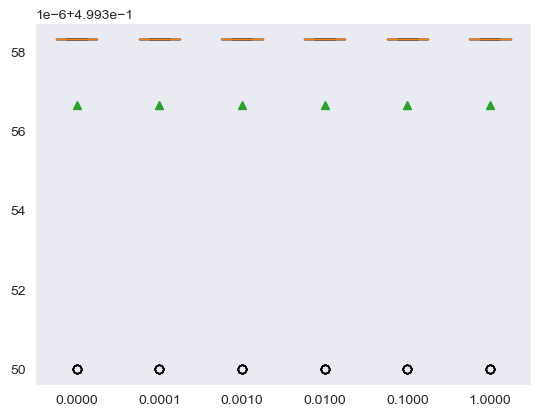

In [97]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import std, mean

#get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
    # create name for model
        key = '%.4f' % p
    # turn off penalty in some cases
        if p == 0.0:
    # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O']
X = pd.DataFrame(data=df.drop('Class',axis=1),columns=labels)
y = pd.DataFrame(data=df['Class'],columns=['Class'])
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model and collect the scores
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

#### In this case, we can see that a C value of 1.0 has the best score of about 49.9 percent, which is the same as using no penalty that achieves the same score
#### A box and whisker plot is created for the accuracy scores for each configuration and all plots are shown side by side on a figure on the same scale for direct comparison. 

In [140]:
final_col = ['B','G','O']
transform_final = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor_final = ColumnTransformer(transformers=[('num', transform_final, final_col)])

pipeline_final = Pipeline(steps=[('preprocessor', preprocessor_final),
                      ('classifier', LogisticRegression())])
pipeline_final.fit(X_train_123,Y_train_123.values.ravel())
results_final = pipeline_final.predict(X_test_123)
actual_final = np.concatenate(Y_test_123.values)
print(" Accuracy:",metrics.accuracy_score(actual_final,results_final))

 Accuracy: 0.4991111111111111


#### Earlier in previous hypothesis, after selecting the same column we get the accuracy of ~0.4988, here we are able to increase substantial increment in accuracy to ~0.4991. So, after applying different models and merging 3 classes of dataframe, we get some positive results.  

### Creating Onnx File with pipeline 

In [148]:
input_types = dict([(x, FloatTensorType([None, 1])) for x in final_col])

try:
    model_onnx = convert_sklearn(pipeline_final,
                                 'test_abhi_onnx',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("test_abhi.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

### Tested output of onnx file 
#### Prediction of  model by loading and computing the output for an input vector

In [149]:
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis]
               for k, v in X_test_123[['B','G','O']].to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("test_abhi.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [2 2 2 ... 2 2 2]


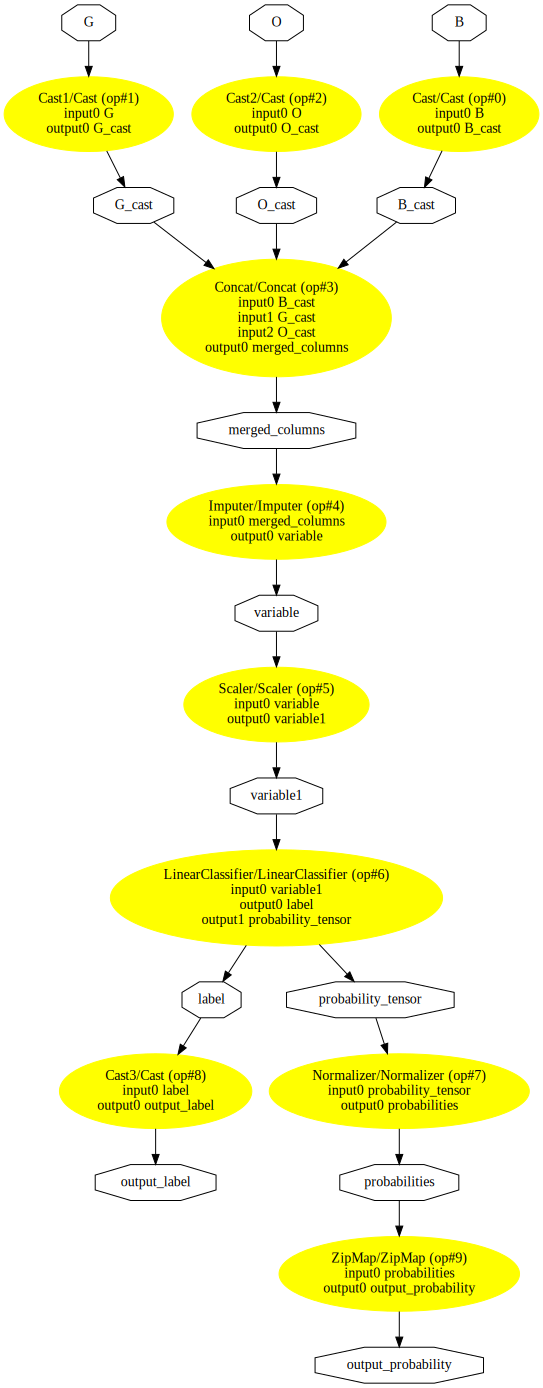

In [150]:
import graphviz
pydot_graph = GetPydotGraph(model_onnx.graph,
                            name=model_onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="yellow",
                                                            fillcolor="yellow",
                                                            style="filled"))

graphviz.Source(pydot_graph)

### Conclusion 
#### New methods for determining the most interesting characteristics in data will be developed as a result of data mining research. Models can be used as a tool in further research as they are created and implemented. Although cross validation has demonstrated that my model does not overfit the data, I believe that further testing is needed to decide which function subset is truly the best.To improve the model's accuracy, further research is needed. I was able to reach the accuracy of ~49.99% which is low but would require more time and research in order to improve my model. 
#### Hence, I learned a lot from this project and was able to understand the core logic and methods of data mining to create a model which has to be trained. Though, I want to further study this dataset and enhance the accuracy and train my model to the best result in future.

### Bibliography
1. Jason Brownlee, Multinomial Logostic Regression : https://machinelearningmastery.com/multinomial-logistic-regression-with-python/ 2021
2. Will Koehrsen, Feature Selector: https://github.com/WillKoehrsen/feature-selector 2019
3. X. Wu, V. Kumar and J. R. Quinlan, “Top 10 algorithms in data mining”, Knowledge and Information Systems, vol. 14, no. 1, (2008),
4. M. Kantardzie,  “Data   mining:   concepts,   models,   methods,   and   algorithms”, JournalComputerInformationScienceEngineering, vol. 5, no. 4,(2005),
5. Phillip Wirth, ONNX model, https://towardsdatascience.com/onnx-easily-exchange-deep-learning-models-f3c42100fd77